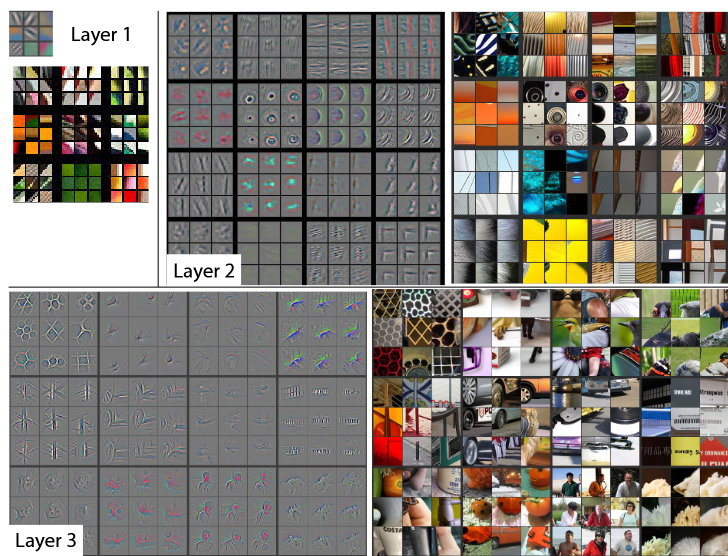
（Zeiler和Fergus 2013）

每个layer的左侧是卷积核(conv kernel)的可视化；右侧是特征图(feature map，即卷积运算的输出)可视化

In [20]:
import torch
from torchvision.models import vgg11, VGG11_Weights

model = vgg11(weights = VGG11_Weights.IMAGENET1K_V1)
model.features # dict(model.features.named_children())

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace=True)
  (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): ReLU(inplace=True)
  (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (16): Conv2d(512, 512, kernel_size=(3, 3), stride=

In [3]:
conv_unit = model.features[3] # dict(model.features.named_children())['3']
conv_unit

Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [5]:
kernel_set = conv_unit.weight.detach()
kernel_set.shape

torch.Size([128, 64, 3, 3])

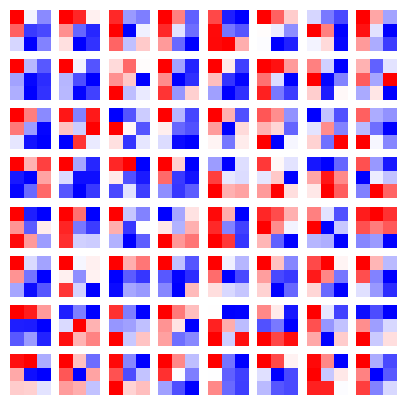

In [16]:
# 可视化第i组卷积核，共64个3x3形状的kernel
i = 0

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
for idx, filer in enumerate(kernel_set[i]): # the 1st group kernel contains 64 kernels
    plt.subplot(8, 8, idx+1) 
    plt.axis('off')
    plt.imshow(filer[ :, :].detach(),cmap='bwr')

In [28]:
class Hook(object):
    def __init__(self):
        self.module_name = []
        self.features_in_hook = []
        self.features_out_hook = []

    def __call__(self,module, fea_in, fea_out):
        print("hooker working", self)
        self.module_name.append(module.__class__)
        self.features_in_hook.append(fea_in)
        self.features_out_hook.append(fea_out)
        return None
    
def plot_feature_map(model, idx, inputs):
    hh = Hook()
    model.features[idx].register_forward_hook(hh)
    
    # forward_model(model,False)
    model.eval()
    _ = model(inputs)
    print(hh.module_name)
    print((hh.features_in_hook[0][0].shape))
    print((hh.features_out_hook[0].shape))
    
    out1 = hh.features_out_hook[0]

    total_ft  = out1.shape[1]
    first_item = out1[0].cpu().clone()    

    plt.figure(figsize=(8, 8))    

    for ftidx in range(total_ft):
        if ftidx > 24:
            break
        ft = first_item[ftidx]
        plt.subplot(5, 5, ftidx+1) 
        
        plt.axis('off')
        #plt.imshow(ft[ :, :].detach(),cmap='gray')
        plt.imshow(ft[ :, :].detach())

hooker working <__main__.Hook object at 0x00000165F60D6390>
hooker working <__main__.Hook object at 0x00000165F5F1BBF0>
hooker working <__main__.Hook object at 0x00000165F7B370E0>
hooker working <__main__.Hook object at 0x00000165F630F0E0>
hooker working <__main__.Hook object at 0x00000165F7EC6450>
hooker working <__main__.Hook object at 0x00000165F838F0E0>
[<class 'torch.nn.modules.conv.Conv2d'>]
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 112, 112])


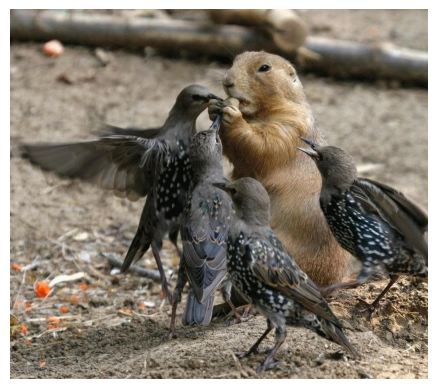

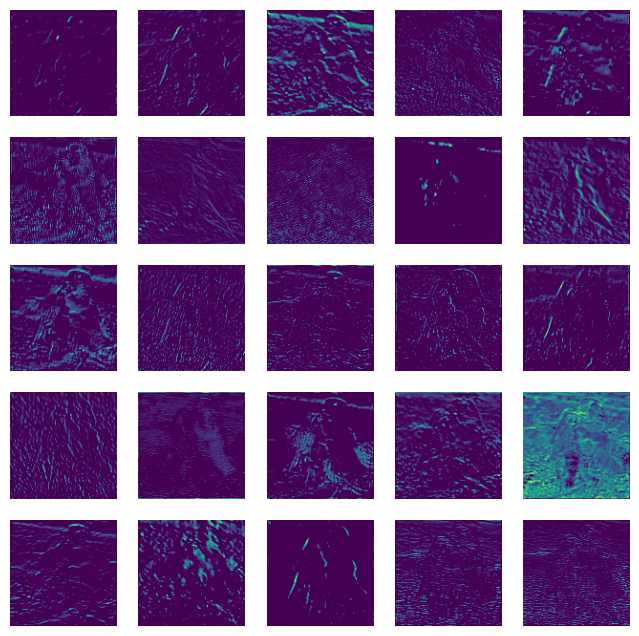

In [29]:
from torchvision.io import read_image
import torch
from torchview import draw_graph
from IPython.display import HTML

img = read_image("squirrel.jpg")
plt.imshow(img.permute(1, 2, 0)  )
plt.axis('off')    
preprocess = VGG11_Weights.IMAGENET1K_V1.transforms()
batch = preprocess(img).unsqueeze(0)

plot_feature_map(model, 3, batch)